In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("Acessos_Banda_Larga_Fixa_2022.csv", sep=";")

In [50]:
df.shape

(3203911, 15)

In [51]:
df.head()

,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Faixa de Velocidade,Velocidade,Tecnologia,Meio de Acesso,Tipo de Pessoa,Acessos
0,2022,6,OUTROS,SINAL BR TELECOM LTDA,11871234000120,Pequeno Porte,SP,Olímpia,3533908,> 34Mbps,"2000,000000",ETHERNET,Fibra,Pessoa Jurídica,1
1,2022,6,OUTROS,COPREL TELECOM LTDA,12388471000106,Pequeno Porte,RS,Panambi,4313904,12Mbps a 34Mbps,"21,000000",FTTH,Fibra,Pessoa Física,1
2,2022,6,OUTROS,NOVA FIBRA TELECOM S.A.,3868136000106,Pequeno Porte,PR,Bandeirantes,4102406,> 34Mbps,"50,000000",FTTH,Fibra,Pessoa Jurídica,110
3,2022,6,OUTROS,ORA SERVICOS DE TELECOMUNICACOES LTDA,22815345000136,Pequeno Porte,PI,Luís Correia,2205706,> 34Mbps,"310,000000",FTTH,Fibra,Pessoa Física,267
4,2022,6,OUTROS,WEBBY TELECOM LTDA,19534139000143,Pequeno Porte,PR,Santo Antônio da Platina,4124103,> 34Mbps,"100,000000",FTTH,Fibra,Pessoa Jurídica,12


## Olha aí Fuezi a fibra crescendo no nosso país. A tendência é que cada vez mais teremos uma migração da tecnologia de par trançado/cobre (ETHERNET) para a FTTH.

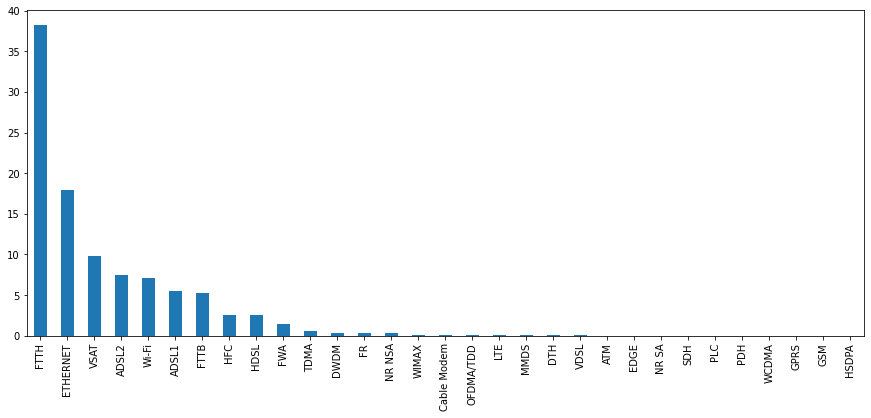

In [52]:
plt.figure(figsize=(15,6))
df["Tecnologia"].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.show()

## Eu decidir fazer uma análise exploratória apenas da tecnologia de fibra e das grandes operadores, no caso TIM, CLARO, VIVO e OI.

In [53]:
df = df.loc[df["Tecnologia"] == "FTTH"]

In [54]:
df = df.loc[df["Porte da Prestadora"] == "Grande Porte"]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168878 entries, 10 to 3146946
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Ano                    168878 non-null  int64 
 1   Mês                    168878 non-null  int64 
 2   Grupo Econômico        168878 non-null  object
 3   Empresa                168878 non-null  object
 4   CNPJ                   168878 non-null  int64 
 5   Porte da Prestadora    168878 non-null  object
 6   UF                     168878 non-null  object
 7   Município              168878 non-null  object
 8   Código IBGE Município  168878 non-null  int64 
 9   Faixa de Velocidade    168878 non-null  object
 10  Velocidade             168878 non-null  object
 11  Tecnologia             168878 non-null  object
 12  Meio de Acesso         168878 non-null  object
 13  Tipo de Pessoa         168878 non-null  object
 14  Acessos                168878 non-null  int64 
dty

## Quando analisamos o número de acessos por empresa, podemos ver que a Vivo está na frente, seguido da Oi.

In [71]:
df.groupby(["Empresa"])["Acessos"].sum()

Empresa
CLARO     4089323
OI       21064309
TIM       2702521
VIVO     29214658
Name: Acessos, dtype: int64

## Aqui na Bahia por exemplo, a Oi disparou.

In [60]:
df2 = df.loc[df["UF"] == "BA"]

In [70]:
df2.groupby(["Empresa"])["Acessos"].sum()

Empresa
CLARO     230548
OI       1085460
TIM       353083
VIVO      457376
Name: Acessos, dtype: int64

In [75]:
df2["Município"].unique()

array(['Mairi', 'Feira de Santana', 'Prado', 'Quijingue', 'Itamaraju',
       'Valente', 'Guanambi', 'Terra Nova', 'Camaçari', 'Jequié',
       'Lauro de Freitas', 'Baixa Grande', 'Itapetinga', 'Porto Seguro',
       'Ilhéus', 'Teixeira de Freitas', 'Barreiras', 'Itabuna',
       'Eunápolis', 'Belmonte', 'Cruz das Almas', 'Vitória da Conquista',
       'Salvador', 'Barra do Choça', 'Santo Antônio de Jesus',
       'Paulo Afonso', 'Itaju do Colônia', 'Castro Alves', 'Anguera',
       'Nazaré', 'Luís Eduardo Magalhães', 'Juazeiro', 'Curaçá',
       'Candeias', 'Rio Real', 'Boa Vista do Tupim', 'Amélia Rodrigues',
       'Ibipeba', 'Valença', 'Dário Meira', 'Camacan', 'Santo Amaro',
       'Santa Maria da Vitória', 'São Sebastião do Passé',
       'Santa Rita de Cássia', 'Ituaçu', 'Brumado', 'Catu',
       'Palmas de Monte Alto', 'Pojuca', 'Presidente Tancredo Neves',
       'Quixabeira', 'Teolândia', 'Macarani', 'Mucuri', 'Ibirapitanga',
       'Iramaia', 'Simões Filho', 'Itapitanga', 'B